In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression  # solo uso esta en la reg lineal
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
import scipy as sp
import scipy.stats
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import STL
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import numpy as np
import sklearn


# Carga de los datos

In [8]:
import os
os.chdir("C:\\Users\\LENOVO\\Desktop\\Universidad\\Series de tiempo\\Series_de_tiempo")

In [9]:
# Cargar el archivo CSV
energia = pd.read_csv("elimitendenerg.csv")
print(energia)

      Energia       Fecha
0       64234  2004-10-02
1      -24660  2004-10-03
2       40351  2004-10-04
3       13452  2004-10-05
4         -31  2004-10-06
...       ...         ...
5048   -19148  2018-07-29
5049    36190  2018-07-30
5050     4654  2018-07-31
5051    -3156  2018-08-01
5052     7828  2018-08-02

[5053 rows x 2 columns]


A continuación se presenta la gráfica de la serie de tiempo.

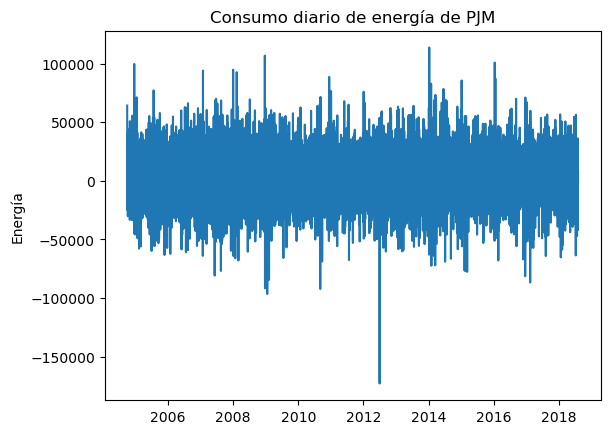

In [10]:
energia['Fecha']=pd.to_datetime(energia['Fecha']) # pasar a formato fecha
Valores_energia=energia.set_index('Fecha') # nuevo dataframe indexado por la fecha
Valores_energia['Energia'] = pd.to_numeric(Valores_energia['Energia'], errors='coerce')
energia_ts=Valores_energia['Energia'] # vector con los valores de la serie

# Serie de tiempo
plt.plot(energia_ts)
plt.title('Consumo diario de energía de PJM')
plt.ylabel('Energía')
plt.show()

In [11]:
indice = pd.date_range(start='1/1/2004', periods=5053, freq='D')
indice
energiats =pd.Series(energia['Energia'].values,index=indice)
energiadf =pd.DataFrame(energia['Energia'].values,index=indice)

# Árboles de decisión

## Creación de variables rezagadas

Dado que el consumo de energía no varía tanto de un día a otro, se toma el último rezago para hacer la predicción un paso hacia adelante con árboles de decisión.

In [19]:
print(energiadf.columns)

RangeIndex(start=0, stop=1, step=1)


In [32]:
from pandas import DataFrame

#df1 = DataFrame()
#print(df1)

#for i in range(1,0,-1):
#    df1[['t-'+str(i)]] = energiadf.shift(i)

#import pandas as pd

# Cargamos el archivo CSV de energía
#df_energia = pd.read_csv("elimitendenerg.csv")

# Convertimos la columna 'fecha' a tipo datetime
#df_energia['Fecha'] = pd.to_datetime(df_energia['Fecha'])

# Establecemos la columna 'fecha' como el índice del dataframe
#df_energia.set_index('Fecha', inplace=True)

# Creamos las variables rezagadas para las estacionalidades de 7 y 182 días
#for i in range(1, 8):  # Rezagos para la estacionalidad semanal
#    df_energia[f'lag_{i}_day'] = df_energia['Energia'].shift(i)

#for i in [182, 364]:  # Rezagos para la estacionalidad semestral (y anual)
#    df_energia[f'lag_{i}_day'] = df_energia['Energia'].shift(i)

# Eliminamos las filas con valores NaN que resultan de los rezagos
#df_energia.dropna(inplace=True)

# Ahora df_energia contiene las columnas de rezago para modelar las estacionalidades
from pandas import DataFrame

# reframe as supervised learning
# lag observation (t-1) is the input variable and t is the output variable.
df1 = DataFrame()
print(df1)

for i in range(7,0,-1):
    df1[['t-'+str(i)]] = energiadf.shift(i)
    
for i in range(182,181,-1):   
    df1[['t-'+str(i)]] = energiadf.shift(i)
    
for i in range(365,364,-1):   
    df1[['t-'+str(i)]] = energiadf.shift(i)
print(df1)

Empty DataFrame
Columns: []
Index: []
                t-7      t-6      t-5      t-4      t-3      t-2      t-1  \
2004-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2004-01-02      NaN      NaN      NaN      NaN      NaN      NaN  64234.0   
2004-01-03      NaN      NaN      NaN      NaN      NaN  64234.0 -24660.0   
2004-01-04      NaN      NaN      NaN      NaN  64234.0 -24660.0  40351.0   
2004-01-05      NaN      NaN      NaN  64234.0 -24660.0  40351.0  13452.0   
...             ...      ...      ...      ...      ...      ...      ...   
2017-10-27 -10026.0  35704.0  20776.0  13445.0    496.0  -6438.0 -42071.0   
2017-10-28  35704.0  20776.0  13445.0    496.0  -6438.0 -42071.0 -19148.0   
2017-10-29  20776.0  13445.0    496.0  -6438.0 -42071.0 -19148.0  36190.0   
2017-10-30  13445.0    496.0  -6438.0 -42071.0 -19148.0  36190.0   4654.0   
2017-10-31    496.0  -6438.0 -42071.0 -19148.0  36190.0   4654.0  -3156.0   

              t-182    t-365  
2004-0

In [33]:
df1['t'] = energiadf.values
print(df1.head(13))

                t-7      t-6      t-5      t-4      t-3      t-2      t-1  \
2004-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2004-01-02      NaN      NaN      NaN      NaN      NaN      NaN  64234.0   
2004-01-03      NaN      NaN      NaN      NaN      NaN  64234.0 -24660.0   
2004-01-04      NaN      NaN      NaN      NaN  64234.0 -24660.0  40351.0   
2004-01-05      NaN      NaN      NaN  64234.0 -24660.0  40351.0  13452.0   
2004-01-06      NaN      NaN  64234.0 -24660.0  40351.0  13452.0    -31.0   
2004-01-07      NaN  64234.0 -24660.0  40351.0  13452.0    -31.0  -1625.0   
2004-01-08  64234.0 -24660.0  40351.0  13452.0    -31.0  -1625.0    807.0   
2004-01-09 -24660.0  40351.0  13452.0    -31.0  -1625.0    807.0 -30197.0   
2004-01-10  40351.0  13452.0    -31.0  -1625.0    807.0 -30197.0 -22143.0   
2004-01-11  13452.0    -31.0  -1625.0    807.0 -30197.0 -22143.0  40366.0   
2004-01-12    -31.0  -1625.0    807.0 -30197.0 -22143.0  40366.0  15535.0   

In [34]:
df1_energia = df1[1:]
print(df1_energia)
df1_energia.size

                t-7      t-6      t-5      t-4      t-3      t-2      t-1  \
2004-01-02      NaN      NaN      NaN      NaN      NaN      NaN  64234.0   
2004-01-03      NaN      NaN      NaN      NaN      NaN  64234.0 -24660.0   
2004-01-04      NaN      NaN      NaN      NaN  64234.0 -24660.0  40351.0   
2004-01-05      NaN      NaN      NaN  64234.0 -24660.0  40351.0  13452.0   
2004-01-06      NaN      NaN  64234.0 -24660.0  40351.0  13452.0    -31.0   
...             ...      ...      ...      ...      ...      ...      ...   
2017-10-27 -10026.0  35704.0  20776.0  13445.0    496.0  -6438.0 -42071.0   
2017-10-28  35704.0  20776.0  13445.0    496.0  -6438.0 -42071.0 -19148.0   
2017-10-29  20776.0  13445.0    496.0  -6438.0 -42071.0 -19148.0  36190.0   
2017-10-30  13445.0    496.0  -6438.0 -42071.0 -19148.0  36190.0   4654.0   
2017-10-31    496.0  -6438.0 -42071.0 -19148.0  36190.0   4654.0  -3156.0   

              t-182    t-365      t  
2004-01-02      NaN      NaN -24660  

50520

## Partición de los datos

Del total de datos, se selecciona un grupo para entrenamiento, el cual corresponde al $70\%$, validación $10\%$ y prueba $20\%$.

In [35]:
energiasplit = df1_energia.values
X1= energiasplit[:, 0:-1] 
y1 =energiasplit[:,-1]

Se tiene el siguiente tamaño para cada uno de los grupos, tanto para la variable respuesta como para las variable predictora.

In [36]:
Y1 = y1
print('Complete Observations for Target after Supervised configuration: %d' %len(Y1))
traintarget_size = int(len(Y1) * 0.70) 
valtarget_size = int(len(Y1) * 0.15)+1# Set split
testtarget_size = int(len(Y1) * 0.15)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

train_target, val_target,test_target = Y1[0:traintarget_size],Y1[(traintarget_size):(traintarget_size+valtarget_size)] ,Y1[(traintarget_size+valtarget_size):len(Y1)]

print('Observaciones respuesta: %d' % (len(Y1)))
print('Observaciones para entrenamiento: %d' % (len(train_target)))
print('Observaciones para validación: %d' % (len(val_target)))
print('Observaciones para prueba: %d' % (len(test_target)))

Complete Observations for Target after Supervised configuration: 5052
3536 758 757
Train + Validation + Test: 5051
Observaciones respuesta: 5052
Observaciones para entrenamiento: 3536
Observaciones para validación: 758
Observaciones para prueba: 758


In [37]:
trainfeature_size = int(len(X1) * 0.70)
valfeature_size = int(len(X1) * 0.15)+1
testfeature_size = int(len(X1) * 0.15)
train_feature, val_feature,test_feature = X1[0:traintarget_size],X1[(traintarget_size):(traintarget_size+valtarget_size)] ,X1[(traintarget_size+valtarget_size):len(Y1)]

print('Observations for Feature: %d' % (len(X1)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 5052
Training Observations for Feature: 3536
Validation Observations for Feature: 758
Test Observations for Feature: 758


## Modelo de regresión de árboles de decisión

Se crea un modelo de árboles de decisión con los argumentos preestablecidos y sin definir la profundidad máxima.

In [38]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_energia = DecisionTreeRegressor()  # max-depth not set
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_energia.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_energia.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",decision_tree_energia.score(val_feature,val_target))  # predictions are horrible if negative value, no relationship if 0
print("el RECM es:",(((decision_tree_energia.predict(val_feature)-val_target)**2).mean())**0.5)

Coeficiente R2 sobre el conjunto de entrenamiento: 0.5886871156202927
Coeficiente R2 sobre el conjunto de Validación: 0.15927247954535906
el RECM es: 22952.95276797354


Se puede notar que el $R^2$ sobre el conjunto de entrenamiento es cercano a $1$ (ya no tanto), y para el conjunto de validación es $0.60514$ lo cual deja ver un sobreajuste, ya que es muy bueno para el conjunto de entrenamiento, y no tan bueno para el conjunto de validación. Se tiene un **RECM** de $28259$ (mejoró xq era mas alto y tiene lógica xq ahora el R2 del de prueba es más alto).  

En la siguiente salida se observa el $R^2$ para el conjunto de entrenamiento y validación, así como el **RECM** para diferentes profundidades del árbol de decisión.

In [39]:
for d in [2, 3, 4, 5,6,7,8,9,10]:
    # Create the tree and fit it
    decision_tree_energia = DecisionTreeRegressor(max_depth=d)
    decision_tree_energia.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('\n max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_energia.score(train_feature, train_target))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_energia.score(val_feature, val_target), '\n')  # You want the test score to be positive and high
    print("el RECM sobre el conjunto de validación es:",sklearn.metrics.mean_squared_error(decision_tree_energia.predict(val_feature),val_target, squared=False),'\n')


 max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.30231869270379397
Coeficiente R2 sobre el conjunto de validación: 0.23060186164608198 

el RECM sobre el conjunto de validación es: 21957.682276616066 


 max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.36419114285376886
Coeficiente R2 sobre el conjunto de validación: 0.2552301627661454 

el RECM sobre el conjunto de validación es: 21603.393232005965 


 max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.40724600386767507
Coeficiente R2 sobre el conjunto de validación: 0.30181285049251116 

el RECM sobre el conjunto de validación es: 20916.87767670055 


 max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.43127357195788485
Coeficiente R2 sobre el conjunto de validación: 0.2918159320730873 

el RECM sobre el conjunto de validación es: 21066.093486264148 


 max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.4583670952372577
Coeficiente R2 sobre el conjunto d

Se puede notar que el menor valor de **RECM** corresponde a una profundidad de $8$, así mismo se tiene un $R^2$ alto para el conjunto de entrenamiento y validación. 

### Juntamos entrenamiento y validación

In [40]:
print(type(train_feature))
print(type(val_feature))

#######

print(type(train_target))
print(type(val_target))

####
print(train_feature.shape)
print(val_feature.shape)

#####

####
print(train_target.shape)
print(val_target.shape)

###Concatenate Validation and test

train_val_feature=np.concatenate((train_feature,val_feature),axis=0)
train_val_target=np.concatenate((train_target,val_target),axis=0)
print(train_val_feature.shape)
print(train_val_target.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3536, 9)
(758, 9)
(3536,)
(758,)
(4294, 9)
(4294,)


Se realiza la predicción un paso adelante utilizando los datos sumados de entrenamiento y validación, con una profundidad de $8$.

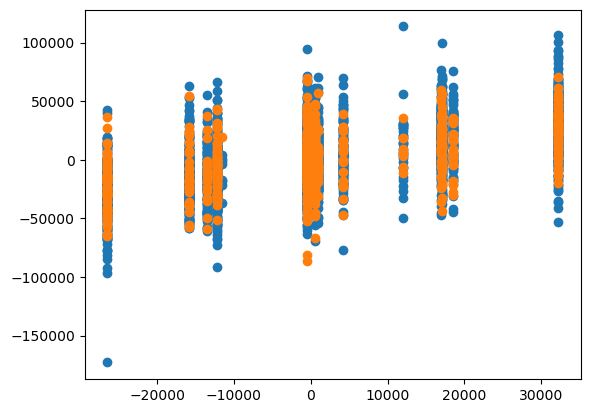

Raíz de la Pérdida cuadrática Entrenamiento: 20096.848983931864
Raíz de la Pérdida cuadrática Prueba: 20756.756336004684


In [41]:
from matplotlib import pyplot as plt

decision_tree_energia = DecisionTreeRegressor(max_depth=4)  # fill in best max depth here
decision_tree_energia.fit(train_val_feature, train_val_target)

# Prediciendo valores para entrenamiento y prueba 
train_val_prediction = decision_tree_energia.predict(train_val_feature)
test_prediction = decision_tree_energia.predict(test_feature)

# Comparación de los valores predichos vs los reales 
plt.scatter(train_val_prediction, train_val_target, label='train')  # blue
plt.scatter(test_prediction, test_target, label='test')  # orange
plt.show()
print("Raíz de la Pérdida cuadrática Entrenamiento:",sklearn.metrics.mean_squared_error( train_val_prediction, train_val_target,squared=False))

print("Raíz de la Pérdida cuadrática Prueba:",sklearn.metrics.mean_squared_error(test_prediction, test_target,squared=False))

Se obtienen **RECM** diferentes para los conjuntos de entrenamiento y prueba, lo que indicaría un ajuste no tan bueno del modelo.

A continuación se presentan el árbol de decisión.

In [42]:
from sklearn import tree

listacaract=list(df1_energia.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_energia)
print(text_representation)

|--- feature_7 <= 12157.50
|   |--- feature_2 <= 12139.50
|   |   |--- feature_5 <= -12469.50
|   |   |   |--- feature_0 <= 3519.00
|   |   |   |   |--- value: [974.24]
|   |   |   |--- feature_0 >  3519.00
|   |   |   |   |--- value: [17082.23]
|   |   |--- feature_5 >  -12469.50
|   |   |   |--- feature_6 <= -8935.00
|   |   |   |   |--- value: [-12238.23]
|   |   |   |--- feature_6 >  -8935.00
|   |   |   |   |--- value: [-470.17]
|   |--- feature_2 >  12139.50
|   |   |--- feature_4 <= -16945.50
|   |   |   |--- feature_2 <= 29838.00
|   |   |   |   |--- value: [4154.07]
|   |   |   |--- feature_2 >  29838.00
|   |   |   |   |--- value: [-13486.41]
|   |   |--- feature_4 >  -16945.50
|   |   |   |--- feature_5 <= -3291.00
|   |   |   |   |--- value: [-15828.62]
|   |   |   |--- feature_5 >  -3291.00
|   |   |   |   |--- value: [-26499.18]
|--- feature_7 >  12157.50
|   |--- feature_5 <= -10883.50
|   |   |--- feature_8 <= 1218.50
|   |   |   |--- value: [32199.28]
|   |   |--- feat

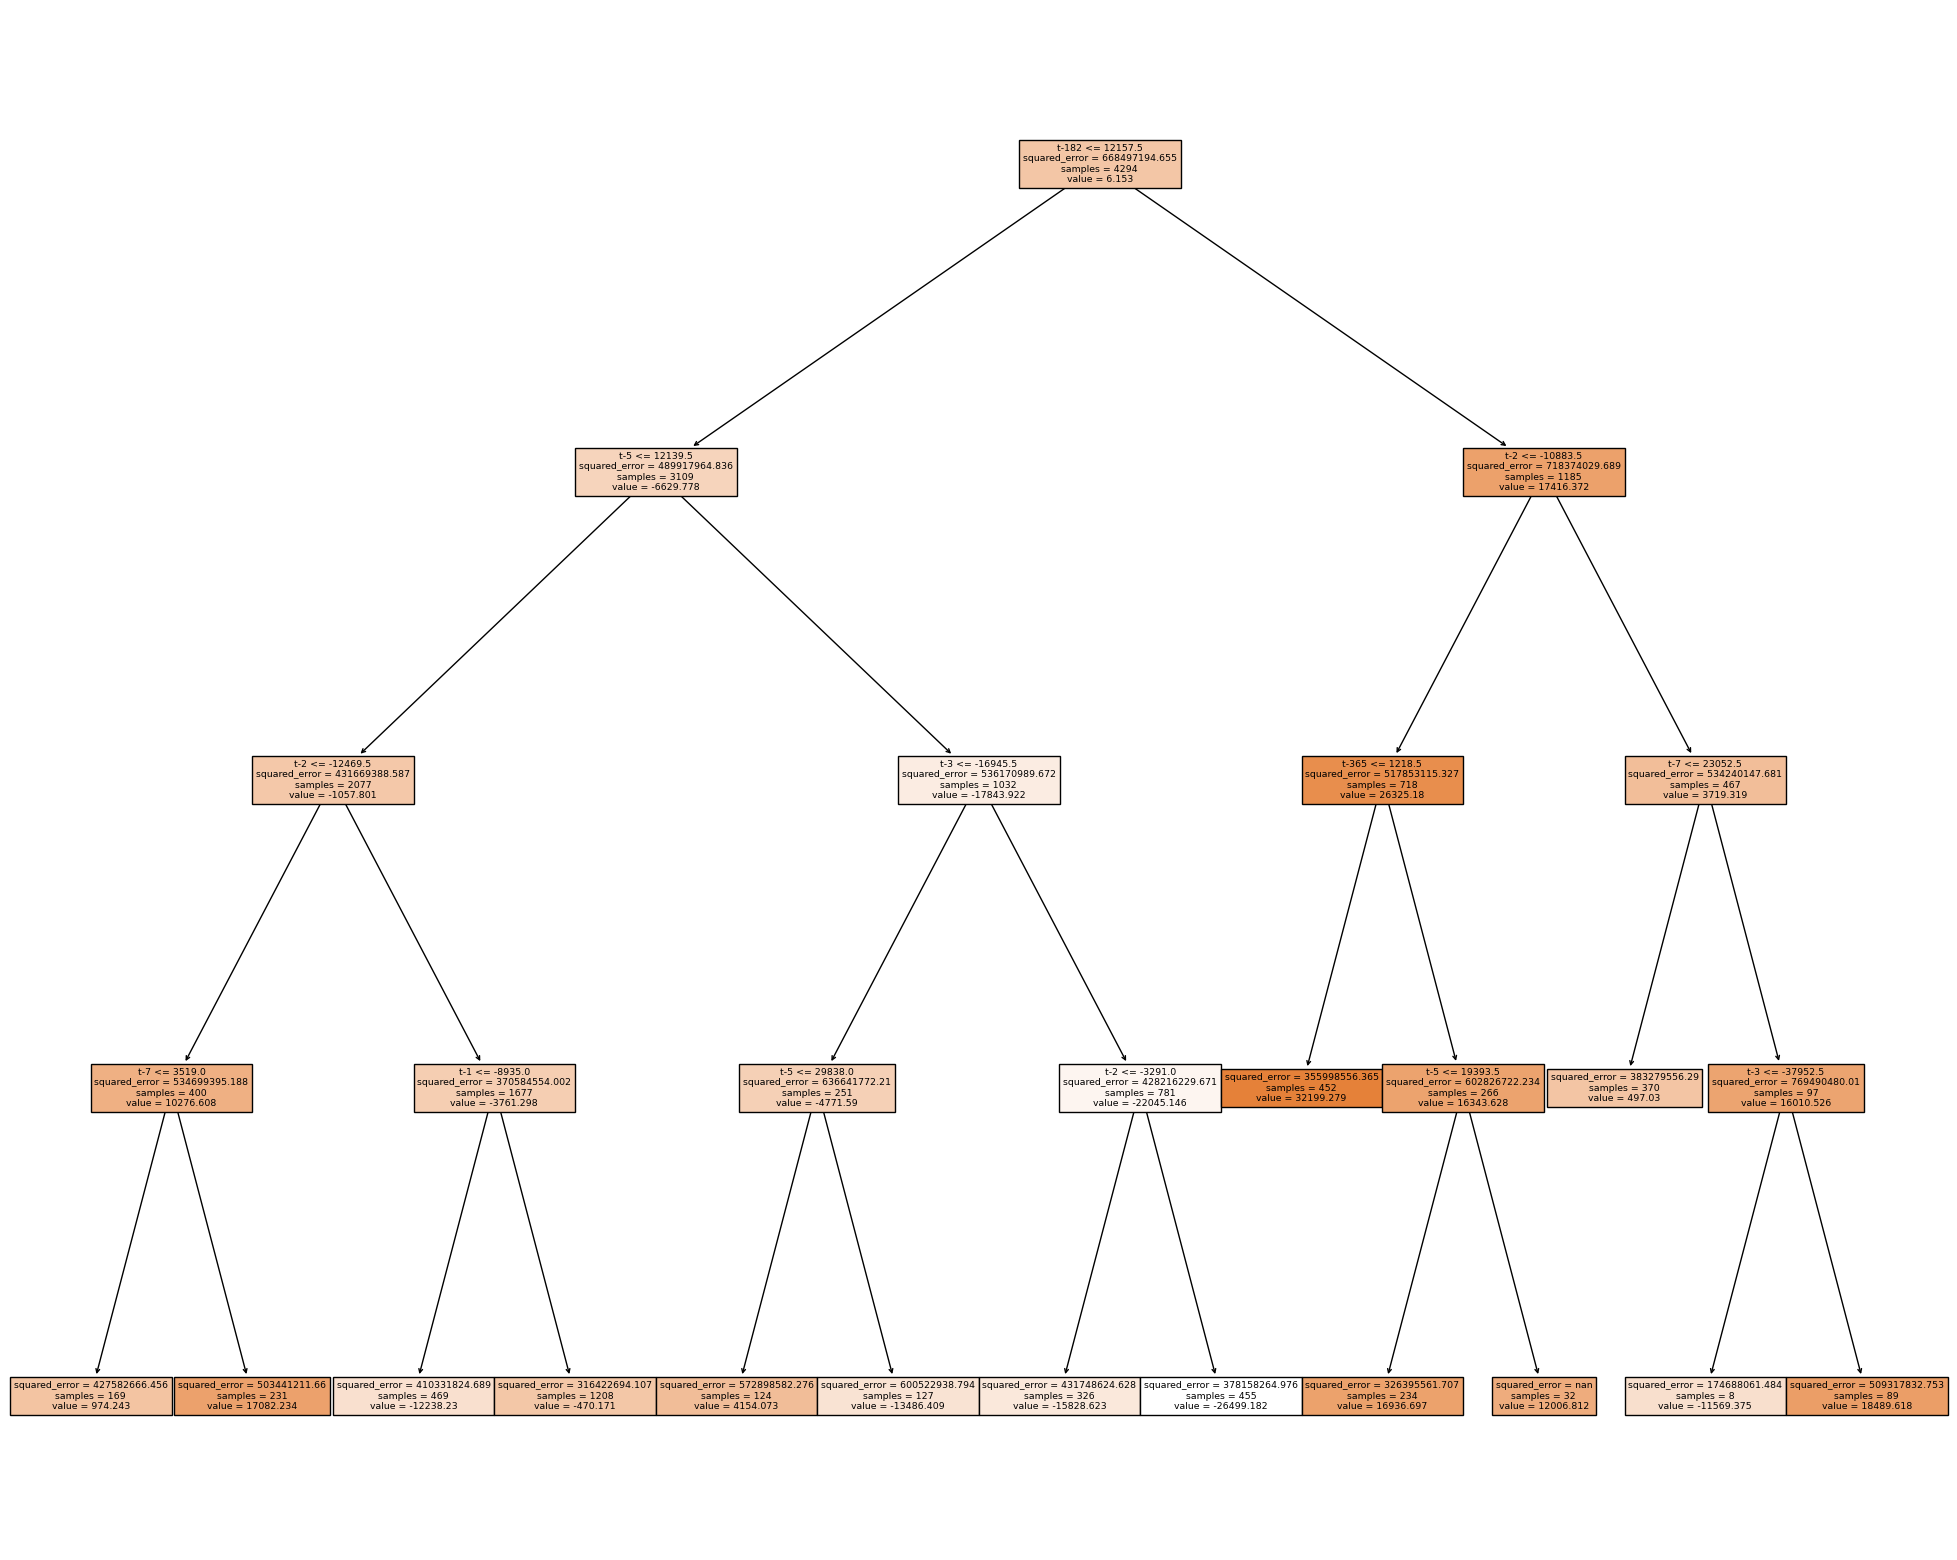

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_energia, 
                   feature_names=listacaract,  
                   class_names=['t'],
                   filled=True)

In [44]:
print(train_val_prediction.size)
print(train_val_target.size)

print(test_prediction.size)
print(test_target.size)

4294
4294
758
758


In [45]:
indicetrian_val_test=df1_energia.index
print(indicetrian_val_test.size)  ###Tamaño del índice
indicetrain_val=indicetrian_val_test[0:3749]
indicetest=indicetrian_val_test[3749:4686]

5052


In [46]:
targetjoint=np.concatenate((train_val_target,test_target))
predictionjoint=np.concatenate((train_val_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

5052
5052


In [52]:
d = {'observado': test_target, 'Predicción': test_prediction}
ObsvsPred=pd.DataFrame(data=d,index=df1_energia.index[4294:5052])
ObsvsPred.head(10)

,observado,Predicción
2015-10-05,42571.0,-470.170530
2015-10-06,7613.0,-470.170530
2015-10-07,309.0,-470.170530
2015-10-08,-38526.0,-470.170530
2015-10-09,-24085.0,-26499.182418
2015-10-10,52390.0,32199.278761
2015-10-11,30661.0,17082.233766
2015-10-12,3663.0,18489.617978
2015-10-13,-6670.0,-470.170530
2015-10-14,-12931.0,-470.170530


Se muestra a continuación el valor observado y el valor predicho.

In [50]:
#d = {'observado': targetjoint, 'Predicción': predictionjoint}
#ObsvsPred=pd.DataFrame(data=d,index=indicetrian_val_test)
#ObsvsPred.head(10)

,observado,Predicción
2004-01-02,-24660.0,-470.170530
2004-01-03,40351.0,-12238.230277
2004-01-04,13452.0,17082.233766
2004-01-05,-31.0,-470.170530
2004-01-06,-1625.0,-26499.182418
2004-01-07,807.0,-470.170530
2004-01-08,-30197.0,-26499.182418
2004-01-09,-22143.0,-26499.182418
2004-01-10,40366.0,17082.233766
2004-01-11,15535.0,17082.233766


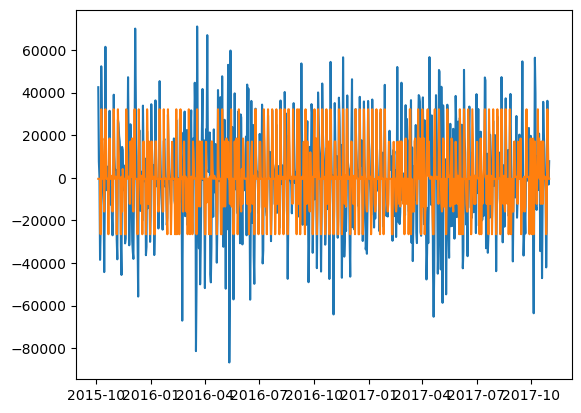

In [53]:
plt.plot(ObsvsPred)

Se puede observar que el modelo se ajusta bien a los datos, sin dejarse influenciar mucho por los valores más extremos.

## Pronósticos para medio año después de 2018

In [123]:
from matplotlib import pyplot as plt

decision_tree_energia = DecisionTreeRegressor(max_depth=4)  # fill in best max depth here
decision_tree_energia.fit(X1,y1)

# Prediciendo valores para todo el conjunto de datos
energia_prediction = decision_tree_energia.predict(X1)

# Gráfico
plt.plot(energia_prediction)

ValueError: Expected 2D array, got scalar array instead:
array=15.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Redes neuronales

In [79]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


print(f"Tensorflow Version: {tf.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"System Version: {sys.version}")

mpl.rcParams['figure.figsize'] = (17, 5)
mpl.rcParams['axes.grid'] = False
sns.set_style("whitegrid")

notebookstart= time.time()

Tensorflow Version: 2.14.0
Pandas Version: 2.0.3
Numpy Version: 1.24.3
System Version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [55]:
import IPython
import IPython.display

In [56]:
df=energia
display(df.head())

,Energia,Fecha
0,64234,2004-10-02
1,-24660,2004-10-03
2,40351,2004-10-04
3,13452,2004-10-05
4,-31,2004-10-06


In [57]:
features_considered = ['Energia']

In [58]:
features = df[features_considered]
features.index = df['Fecha']
features.head()

,Energia
Fecha,
2004-10-02,64234
2004-10-03,-24660
2004-10-04,40351
2004-10-05,13452
2004-10-06,-31


Nuevamente se presenta la gráfica de la serie de tiempo.

<Axes: xlabel='Fecha'>

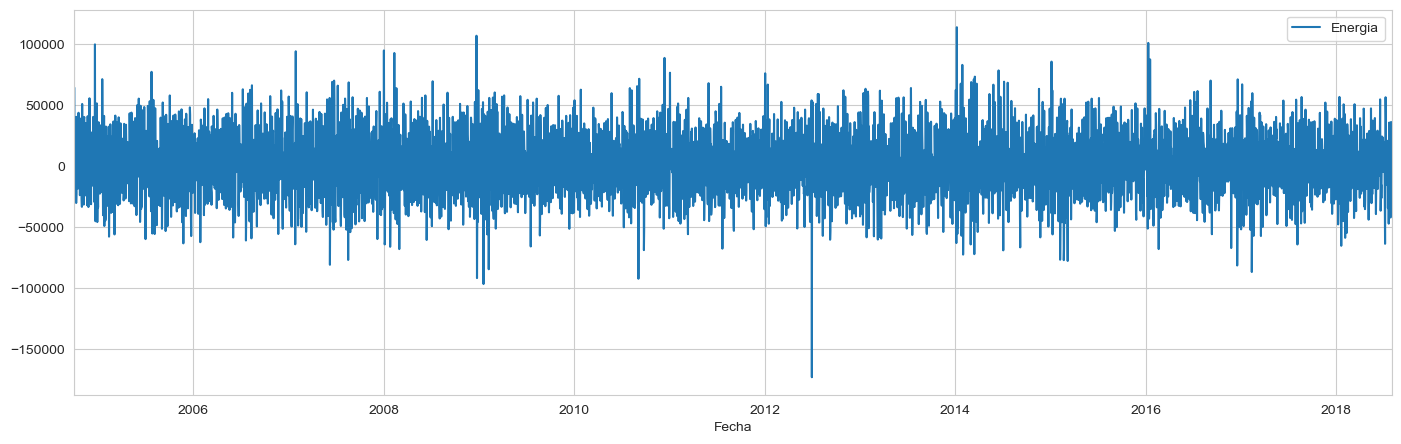

In [59]:
features.plot()

In [60]:
column_indices = {name: i for i, name in enumerate(features.columns)}

n = len(features)
train_df = features[0:int(n*0.7)]
val_df = features[int(n*0.7):int(n*0.85)]
test_df = features[int(n*0.85):]

num_features = features.shape[1]

Se normalizan los datos para estabilizar la varianza marginal no constante y la tendencia en caso de que la serie tuviera.

In [61]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [62]:
train_df

,Energia
Fecha,
2004-10-02,2.465109
2004-10-03,-0.947247
2004-10-04,1.548317
2004-10-05,0.515751
2004-10-06,-0.001819
...,...
2014-06-04,-0.647293
2014-06-05,-0.803604
2014-06-06,-0.199779


Se presenta el tamaño de los conjuntos de entrenamiento, validación y prueba.

In [85]:
print("longitud dataframe entrenamiento:",train_df.shape)
print("longitud dataframe validación:",val_df.shape)
print("longitud dataframe prueba:",test_df.shape)

longitud dataframe entrenamiento: (3537, 1)
longitud dataframe validación: (758, 1)
longitud dataframe prueba: (759, 1)


# Window Generator

In [86]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


# Split

In [87]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

# Objetos a tensor flow

In [88]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=128,) ##### Tamaño del lote

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [89]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

# Definir las gráficas

In [90]:
def plot(self, model=None, plot_col='Energia', max_subplots=2):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

# Configuración para el modelo de los ajustes

In [91]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

# Empezar

Se realiza la predicción un paso hacia adelante con un único rezago, dado que el consumo de energía no varía mucho de un día a otro.

In [1]:
single_step_window = WindowGenerator(
    input_width=9, label_width=1, shift=1,
    label_columns=['Energia'])
single_step_window
# Para las estacionalidades de 7 días y 182 días, necesitas un ancho de entrada de 182 + 6 días adicionales para cubrir la semana.
#input_width = 182 + 6  # Esto abarca el rezago semestral y los 6 días adicionales para cubrir la semana completa

# Actualizamos la instancia de 'WindowGenerator'
#single_step_window = WindowGenerator(
#    input_width=input_width,  # Esto ahora cubrirá tanto la estacionalidad semanal como la semestral
#    label_width=1,            # Seguimos queriendo predecir un solo día hacia adelante
#    shift=1,                  # La predicción es para el siguiente punto de tiempo
#    label_columns=['Energia'] # La columna que queremos predecir
#)


NameError: name 'WindowGenerator' is not defined

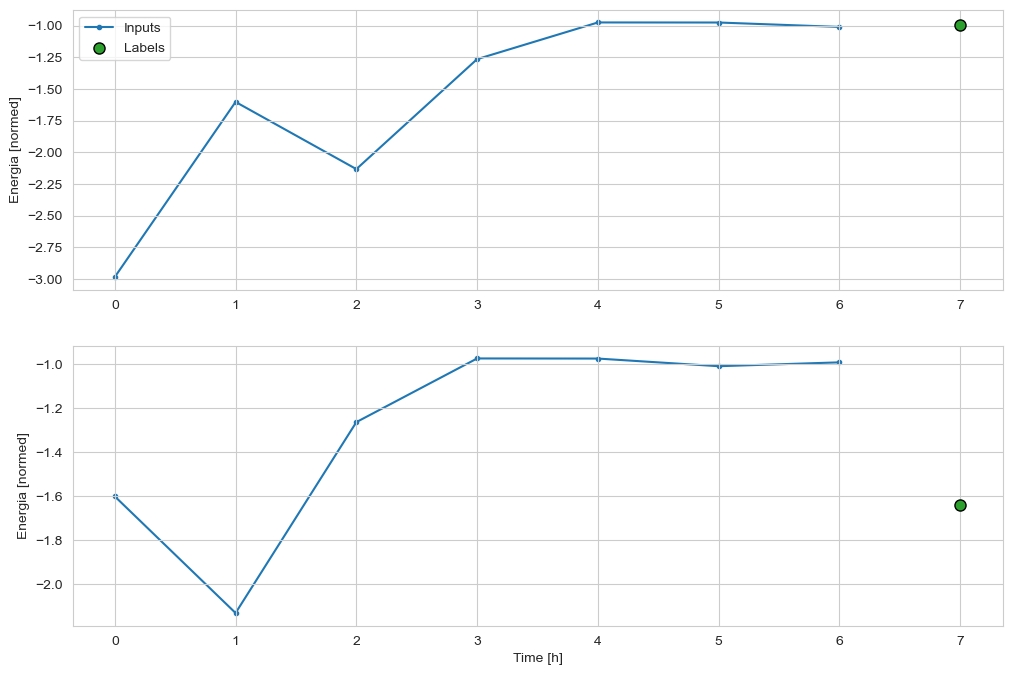

In [216]:
single_step_window.plot()

In [217]:
i=1
for batch in single_step_window.train.take(2):
    inputs, targets = batch
    print("Covariable o input del lote",i,inputs)
    print("Respuesta o etiqueta del lote ",i,targets)
    print("tipo de objeto inputs del lote",i,type(inputs))
    i=i+1

Covariable o input del lote 1 tf.Tensor(
[[[-2.9844303 ]
  [-1.6029601 ]
  [-2.1330855 ]
  [-1.2652004 ]
  [-0.9757571 ]
  [-0.97625524]
  [-1.011031  ]]

 [[-1.6029601 ]
  [-2.1330855 ]
  [-1.2652004 ]
  [-0.9757571 ]
  [-0.97625524]
  [-1.011031  ]
  [-0.99350864]]

 [[-2.1330855 ]
  [-1.2652004 ]
  [-0.9757571 ]
  [-0.97625524]
  [-1.011031  ]
  [-0.99350864]
  [-1.6427028 ]]

 [[-1.2652004 ]
  [-0.9757571 ]
  [-0.97625524]
  [-1.011031  ]
  [-0.99350864]
  [-1.6427028 ]
  [-2.1187022 ]]

 [[-0.9757571 ]
  [-0.97625524]
  [-1.011031  ]
  [-0.99350864]
  [-1.6427028 ]
  [-2.1187022 ]
  [-1.2504945 ]]

 [[-0.97625524]
  [-1.011031  ]
  [-0.99350864]
  [-1.6427028 ]
  [-2.1187022 ]
  [-1.2504945 ]
  [-0.9162579 ]]

 [[-1.011031  ]
  [-0.99350864]
  [-1.6427028 ]
  [-2.1187022 ]
  [-1.2504945 ]
  [-0.9162579 ]
  [-0.9851394 ]]

 [[-0.99350864]
  [-1.6427028 ]
  [-2.1187022 ]
  [-1.2504945 ]
  [-0.9162579 ]
  [-0.9851394 ]
  [-0.96875674]]

 [[-1.6427028 ]
  [-2.1187022 ]
  [-1.2504945 ]

In [218]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [219]:
baseline = Baseline(label_index=column_indices['Energia'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

6/6 [==============================] - 0s 3ms/step - loss: 0.7469 - mean_absolute_error: 0.6652


In [220]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,label_columns=['Energia'])
wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['Energia']

In [221]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (128, 30, 1)
Output shape: (128, 30, 1)


A continuación se pueden notar los valores de la serie y las predicciones realizadas por el modelo base.

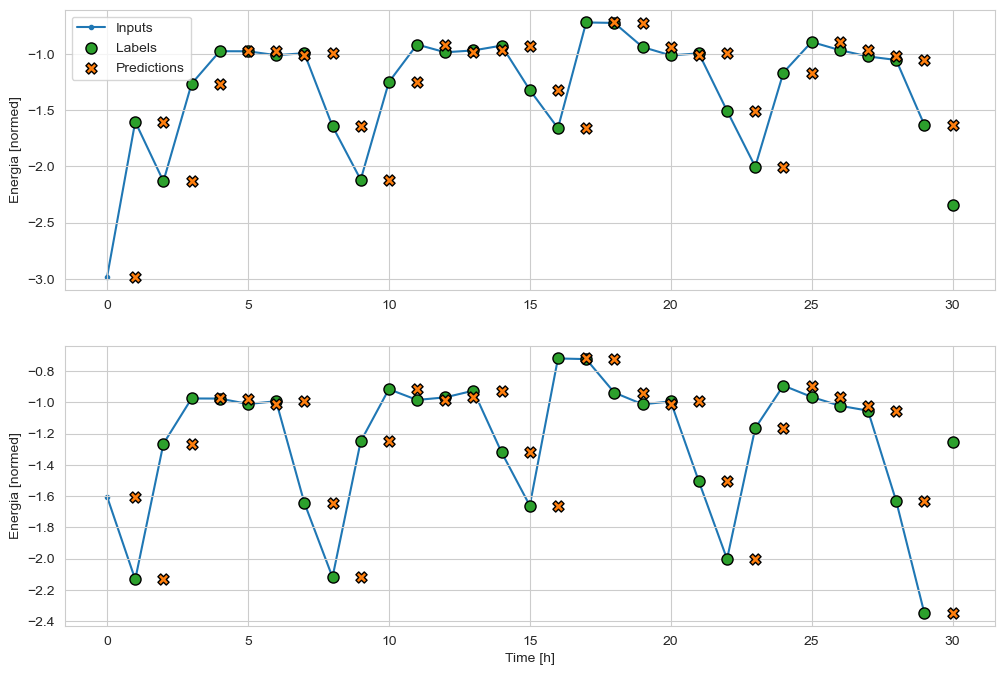

In [222]:
wide_window.plot(baseline)

# Multicapa

## Tuning o búsqueda de los hiperparámetros

In [81]:
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers

Using TensorFlow backend


In [224]:
for batch in single_step_window.train.take(1):
    inputs_train,targets_train = batch
    
print("Input shape:", inputs_train.numpy().shape)
print("Target shape:", targets_train.numpy().shape)

Input shape: (128, 7, 1)
Target shape: (128, 1, 1)


In [225]:
for batch in single_step_window.val.take(1):
    inputs_val,targets_val = batch

print("Input shape:", inputs_val.numpy().shape)
print("Target shape:", targets_val.numpy().shape)

Input shape: (128, 7, 1)
Target shape: (128, 1, 1)


In [226]:
single_step_window.train.element_spec

(TensorSpec(shape=(None, 7, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [227]:
input_dataset_train = single_step_window.train.map(lambda x,y: x)
target_dataset_train = single_step_window.train.map(lambda x,y: y)

In [228]:
input_dataset_train

<_MapDataset element_spec=TensorSpec(shape=(None, 7, 1), dtype=tf.float32, name=None)>

In [229]:
input_dataset_val = single_step_window.val.map(lambda x,y: x)
target_dataset_val = single_step_window.val.map(lambda x,y: y)

In [230]:
print(input_dataset_val)
print(target_dataset_val)

<_MapDataset element_spec=TensorSpec(shape=(None, 7, 1), dtype=tf.float32, name=None)>
<_MapDataset element_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None)>


In [231]:
input_dataset_test = single_step_window.test.map(lambda x,y: x)
target_dataset_test = single_step_window.test.map(lambda x,y: y)

In [232]:
print(input_dataset_test)
print(target_dataset_test)

<_MapDataset element_spec=TensorSpec(shape=(None, 7, 1), dtype=tf.float32, name=None)>
<_MapDataset element_spec=TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None)>


In [233]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int("num_units", min_value=32, max_value=564, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=564, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["mean_squared_error"]
    )
    return model


build_model(kt.HyperParameters())

In [234]:
tuner_RandomSearch_mlp = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=3,
    executions_per_trial=1,
    overwrite=True,
    directory="dirsalida",
    project_name="helloworld",
)

In [235]:
tuner_RandomSearch_mlp.search_space_summary()

Search space summary
Default search space size: 6
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 564, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 564, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [236]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=0)

In [237]:
tuner_RandomSearch_mlp.search((single_step_window.train), epochs=5, validation_data=(single_step_window.val),callbacks=[stop_early])


Trial 3 Complete [00h 00m 04s]
val_loss: 0.605427086353302

Best val_loss So Far: 0.605427086353302
Total elapsed time: 00h 00m 09s


In [238]:
# Get the top 2 models.
models_mlp = tuner_RandomSearch_mlp.get_best_models(num_models=2)
best_model_mlp = models_mlp[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model_mlp.build(input_shape=(128, 1, 1))
best_model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (128, 1, 288)             576       
                                                                 
 dense_1 (Dense)             (128, 1, 288)             83232     
                                                                 
 dense_2 (Dense)             (128, 1, 128)             36992     
                                                                 
 dense_3 (Dense)             (128, 1, 192)             24768     
                                                                 
 dropout (Dropout)           (128, 1, 192)             0         
                                                                 
 dense_4 (Dense)             (128, 1, 1)               193       
                                                                 
Total params: 145761 (569.38 KB)
Trainable params: 14576

Se puede notar que en la primera capa oculta se tienen $64$ unidades, en la segunda capa oculta se tiene $352$, tercera $352$ y en la última $1$ ya que se está realizando una predicción un paso hacia adelante.

In [239]:
tuner_RandomSearch_mlp.results_summary()

Results summary
Results in dirsalida\helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 2 summary
Hyperparameters:
num_units: 288
activation: relu
num_layers: 3
units_0: 288
dropout: True
lr: 0.0007980355466364588
units_1: 128
units_2: 192
Score: 0.605427086353302

Trial 1 summary
Hyperparameters:
num_units: 512
activation: tanh
num_layers: 1
units_0: 32
dropout: True
lr: 0.0006817113246107111
units_1: 448
units_2: 256
Score: 0.6086497902870178

Trial 0 summary
Hyperparameters:
num_units: 384
activation: tanh
num_layers: 3
units_0: 64
dropout: False
lr: 0.0037713086175852817
units_1: 32
units_2: 32
Score: 0.6126658320426941


In [240]:
train_plus_val=single_step_window.train.concatenate(single_step_window.val)###verificar que en efecto

In [241]:
train_plus_val

<_ConcatenateDataset element_spec=(TensorSpec(shape=(None, 7, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

In [242]:
# Get the top 2 hyperparameters.
best_hps_mlp = tuner_RandomSearch_mlp.get_best_hyperparameters(5)
# Build the model with the best hp.
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5)
model_mlp = build_model(best_hps_mlp[0])
# Fit with the entire dataset.
model_mlp.fit(train_plus_val, epochs=10,callbacks=[callback])

Epoch 1/10
34/34 [==============================] - 1s 11ms/step - loss: 0.6949 - mean_squared_error: 0.6949
Epoch 2/10
34/34 [==============================] - 0s 12ms/step - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 3/10
34/34 [==============================] - 0s 11ms/step - loss: 0.6363 - mean_squared_error: 0.6363
Epoch 4/10
34/34 [==============================] - 0s 11ms/step - loss: 0.6358 - mean_squared_error: 0.6358
Epoch 5/10
34/34 [==============================] - 0s 11ms/step - loss: 0.6354 - mean_squared_error: 0.6354
Epoch 6/10
34/34 [==============================] - 0s 11ms/step - loss: 0.6364 - mean_squared_error: 0.6364
Epoch 7/10
34/34 [==============================] - 0s 11ms/step - loss: 0.6366 - mean_squared_error: 0.6366
Epoch 8/10
34/34 [==============================] - 0s 12ms/step - loss: 0.6352 - mean_squared_error: 0.6352
Epoch 9/10
34/34 [==============================] - 0s 12ms/step - loss: 0.6349 - mean_squared_error: 0.6349
Epoch 10/10
34/34 [

In [243]:
print(model_mlp.layers[0].weights)

[<tf.Variable 'dense_3/kernel:0' shape=(1, 288) dtype=float32, numpy=
array([[-0.00847516,  0.0490763 , -0.02942309,  0.11768491,  0.13491446,
         0.01461732,  0.12624882,  0.05018155, -0.11085527,  0.12302448,
         0.07090962,  0.00099314,  0.13711105, -0.03949654,  0.00131606,
         0.1335084 ,  0.01762375, -0.01056829,  0.08648301,  0.00786186,
         0.09116343,  0.02913445,  0.11641038,  0.04525005, -0.06689857,
        -0.08743344,  0.03141817,  0.13606952,  0.05737026, -0.08795533,
        -0.12564601,  0.10502055, -0.12798122,  0.12214891,  0.03796738,
         0.02209625,  0.06072179, -0.02910743, -0.06008634, -0.13071689,
         0.11159693, -0.03102494, -0.05689073,  0.08630275,  0.07735284,
        -0.09060142, -0.07505596, -0.05084813,  0.06688436,  0.075354  ,
        -0.07839858, -0.11192711,  0.12803182, -0.03587247, -0.10458482,
        -0.0690737 , -0.133022  ,  0.00657518,  0.02999501, -0.05760535,
         0.01837934,  0.09688319, -0.09624819, -0.0320

In [244]:
print(model_mlp.layers[0].bias.numpy())

[-0.00216983 -0.03488572  0.01076851 -0.0156252   0.00119203 -0.01746181
 -0.01125023 -0.01169181  0.00523074 -0.01242002  0.00095073 -0.00518548
  0.00403957  0.00213161 -0.00682018 -0.01384136 -0.02413187  0.01421402
 -0.03550378 -0.02336245 -0.00754074 -0.03273226 -0.00959794 -0.01943797
  0.00913909 -0.01517174  0.0233049  -0.00105776 -0.01742069 -0.03076494
  0.00655329  0.00041853  0.00120302  0.00563393  0.02779688 -0.00169066
  0.00410681 -0.00639771 -0.02063651  0.00440555 -0.01599258 -0.02679349
 -0.00930874 -0.02713668 -0.00134768  0.01060875 -0.00098575 -0.02846346
  0.00250893  0.00189337  0.00570602 -0.00874313 -0.00913768 -0.01116829
 -0.0030165  -0.00796242 -0.00742178 -0.01145375 -0.00337924  0.01280418
  0.01341066 -0.01590657  0.0053281   0.01275769  0.01640062  0.00397598
  0.01199732 -0.00458267 -0.01288451 -0.00193097 -0.03433418 -0.00141036
 -0.01650367  0.00383468 -0.01456634 -0.01338652 -0.00271475 -0.03669919
  0.00017855 -0.01143899 -0.00801649  0.00022194  0

In [245]:
model_mlp.evaluate(single_step_window.test, verbose=1)

6/6 [==============================] - 0s 5ms/step - loss: 0.5998 - mean_squared_error: 0.5998


[0.5998397469520569, 0.5998396873474121]

In [246]:
model_mlp.predict(single_step_window.test).flatten()

6/6 [==============================] - 0s 5ms/step


array([-0.2366561 ,  0.32904068,  0.40206233, ...,  0.1499978 ,
        0.19472861,  0.16487348], dtype=float32)

In [247]:
prediction_test=(model_mlp.predict(single_step_window.test, verbose=1)*train_std['Energia']+train_mean['Energia'])

6/6 [==============================] - 0s 5ms/step


In [248]:
print(prediction_test.shape)
print(prediction_test)

(752, 7, 1)
[[[ -9874.922 ]
  [ 16431.398 ]
  [ 19827.09  ]
  ...
  [  2814.6633]
  [-20958.19  ]
  [ 15423.111 ]]

 [[ 16431.398 ]
  [ 19827.09  ]
  [ 19968.092 ]
  ...
  [-20958.19  ]
  [ 15423.111 ]
  [ 29141.8   ]]

 [[ 19827.09  ]
  [ 19968.092 ]
  [  2814.6633]
  ...
  [ 15423.111 ]
  [ 29141.8   ]
  [ 30794.328 ]]

 ...

 [[ 15806.618 ]
  [ 21799.104 ]
  [ 22024.055 ]
  ...
  [ -2430.982 ]
  [-21190.602 ]
  [  8105.4556]]

 [[ 21799.104 ]
  [ 22024.055 ]
  [ 19160.791 ]
  ...
  [-21190.602 ]
  [  8105.4556]
  [ 10185.551 ]]

 [[ 22024.055 ]
  [ 19160.791 ]
  [ -2430.982 ]
  ...
  [  8105.4556]
  [ 10185.551 ]
  [  8797.212 ]]]


In [249]:
i=1
for batch in target_dataset_test.take(8): # Salieron 8 lotes
    if i==1:
        targets_test = batch.numpy()
    elif i>1:
        targets_test_aux = batch.numpy()
        targets_test=np.append(targets_test,targets_test_aux)
    i=i+1

In [253]:
print(targets_test.shape)
true_series=targets_test*train_std['Energia']+train_mean['Energia']
true_series=true_series.reshape((752, 1, 1))
print(true_series.shape)

(752,)
(752, 1, 1)


In [254]:
errors_squared=tf.keras.metrics.mean_squared_error(true_series, prediction_test).numpy()
print("RECM:",errors_squared.mean()**0.5)

RECM: 36015.880941606854


In [255]:
test_index=test_df.index[:1010]
test_index.values

array(['2016-07-05T00:00:00.000000000', '2016-07-06T00:00:00.000000000',
       '2016-07-07T00:00:00.000000000', '2016-07-08T00:00:00.000000000',
       '2016-07-09T00:00:00.000000000', '2016-07-10T00:00:00.000000000',
       '2016-07-11T00:00:00.000000000', '2016-07-12T00:00:00.000000000',
       '2016-07-13T00:00:00.000000000', '2016-07-14T00:00:00.000000000',
       '2016-07-15T00:00:00.000000000', '2016-07-16T00:00:00.000000000',
       '2016-07-17T00:00:00.000000000', '2016-07-18T00:00:00.000000000',
       '2016-07-19T00:00:00.000000000', '2016-07-20T00:00:00.000000000',
       '2016-07-21T00:00:00.000000000', '2016-07-22T00:00:00.000000000',
       '2016-07-23T00:00:00.000000000', '2016-07-24T00:00:00.000000000',
       '2016-07-25T00:00:00.000000000', '2016-07-26T00:00:00.000000000',
       '2016-07-27T00:00:00.000000000', '2016-07-28T00:00:00.000000000',
       '2016-07-29T00:00:00.000000000', '2016-07-30T00:00:00.000000000',
       '2016-07-31T00:00:00.000000000', '2016-08-01

In [258]:
true_series_final=true_series.reshape(752)
prediction_test_final=prediction_test.reshape(5264)

Text(0, 0.5, 'Y y $\\hat{Y}$ en conjunto de prueba')

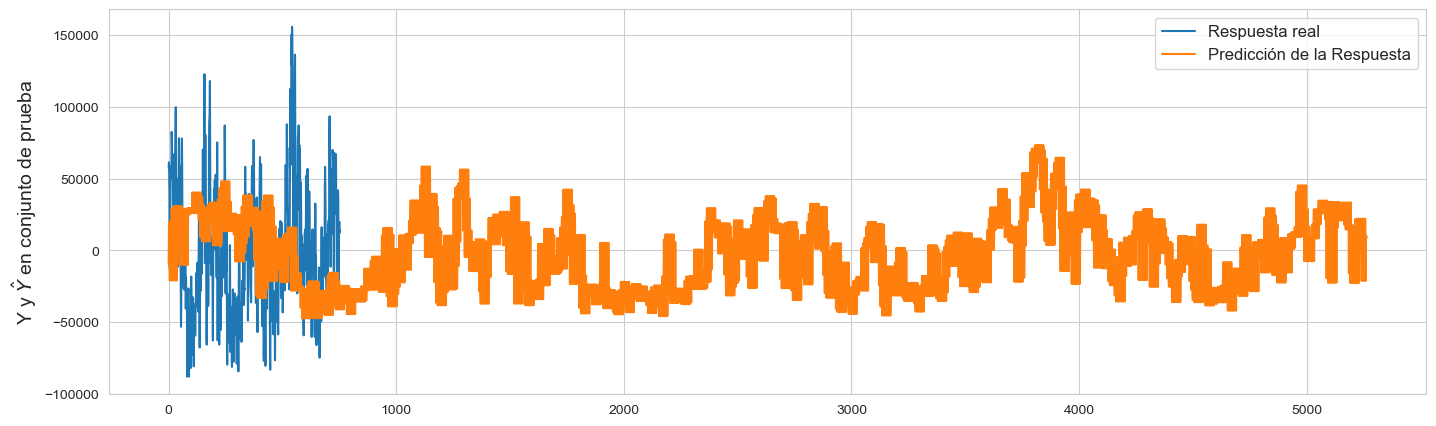

In [260]:
plt.plot(true_series_final)
plt.plot(prediction_test_final)
plt.legend(['Respuesta real','Predicción de la Respuesta'],loc="best", fontsize=12)
plt.ylabel('Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)

En conclusión, se tiene un **RECM** igual a $24187.58$ sobre el conjunto de prueba, usando árboles de decisión, y un **RECM** igual a $23465.06$, sobre el conjunto de prueba, usando una red neuronal multicapa, por lo que se concluye que la red neuronal predice mejor que el árbol de desición, en este caso.

# Redes por otro lado

In [98]:
energia2 = pd.read_csv("energia.csv")
indice = pd.date_range(start='1/1/2004', periods=5054, freq='D')
energiadf =pd.DataFrame(energia2['Energia'].values,index=indice)

In [99]:
from pandas import DataFrame

SerieOri=pd.DataFrame(energiadf)
dfEner=DataFrame()

for i in range(7,0,-1):
    dfEner[['t-'+str(i)]] = SerieOri.shift(i)
    
for i in range(182,181,-1):
    dfEner[['t-'+str(i)]] = SerieOri.shift(i)


dfEner['t'] = SerieOri.values

dfEner

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t-182,t
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254046
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,254046.0,NaN,318280
2004-01-03,NaN,NaN,NaN,NaN,NaN,254046.0,318280.0,NaN,293620
2004-01-04,NaN,NaN,NaN,NaN,254046.0,318280.0,293620.0,NaN,333971
2004-01-05,NaN,NaN,NaN,254046.0,318280.0,293620.0,333971.0,NaN,347423
...,...,...,...,...,...,...,...,...,...
2017-10-28,323527.0,359231.0,380007.0,393452.0,393948.0,387510.0,345439.0,323591.0,326291
2017-10-29,359231.0,380007.0,393452.0,393948.0,387510.0,345439.0,326291.0,374247.0,362481
2017-10-30,380007.0,393452.0,393948.0,387510.0,345439.0,326291.0,362481.0,424097.0,367135
2017-10-31,393452.0,393948.0,387510.0,345439.0,326291.0,362481.0,367135.0,433127.0,363979


In [100]:
dfEner_corta = dfEner[183:]
print(dfEner_corta.head(12))
dfEner_corta.shape

CortasplitEner = dfEner_corta.values
XEner = CortasplitEner[:, 0:-1]
yEner = CortasplitEner[:,-1]

                 t-7       t-6       t-5       t-4       t-3       t-2  \
2004-07-02  332076.0  315677.0  350760.0  362744.0  351491.0  340075.0   
2004-07-03  315677.0  350760.0  362744.0  351491.0  340075.0  347446.0   
2004-07-04  350760.0  362744.0  351491.0  340075.0  347446.0  346920.0   
2004-07-05  362744.0  351491.0  340075.0  347446.0  346920.0  325007.0   
2004-07-06  351491.0  340075.0  347446.0  346920.0  325007.0  347524.0   
2004-07-07  340075.0  347446.0  346920.0  325007.0  347524.0  346334.0   
2004-07-08  347446.0  346920.0  325007.0  347524.0  346334.0  337384.0   
2004-07-09  346920.0  325007.0  347524.0  346334.0  337384.0  338827.0   
2004-07-10  325007.0  347524.0  346334.0  337384.0  338827.0  338807.0   
2004-07-11  347524.0  346334.0  337384.0  338827.0  338807.0  310732.0   
2004-07-12  346334.0  337384.0  338827.0  338807.0  310732.0  287064.0   
2004-07-13  337384.0  338827.0  338807.0  310732.0  287064.0  321700.0   

                 t-1     t-182       

In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

XCon_train=XEner[0:3409]
XCon_val=XEner[3409:4140]
XCon_test=XEner[4140:]
XCon_train_full=XEner[0:4870]

yCon_train=yEner[0:3409]
yCon_val=yEner[3409:4140]
yCon_test=yEner[4140:]
yCon_train_full=yEner[0:4870]

scaler=MinMaxScaler()
XCon_train=scaler.fit_transform(XCon_train)
XCon_val=scaler.transform(XCon_val)
XCon_test=scaler.transform(XCon_test)
XCon_train_full=scaler.transform(XCon_train_full)

print('Observations for feature: %d' % (len(dfEner)))
print('Training Observations for feature: %d' % (len(XCon_train)))
print('Validation Observations for feature: %d' % (len(XCon_val)))
print('Testing Observations for feature: %d' % (len(XCon_test)))

Observations for feature: 5054
Training Observations for feature: 3409
Validation Observations for feature: 731
Testing Observations for feature: 731


In [110]:
tf.random.set_seed(123)
#Intento 1: MSE=613529728
#input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
#hidden1 = keras.layers.Dense(64,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(32,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento 2: RECM = 20830.145 
input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
hidden1 = keras.layers.Dense(288,activation="relu")(input_layer)
hidden2 = keras.layers.Dense(128,activation="relu")(hidden1)
hidden3 = keras.layers.Dense(192,activation="relu")(hidden2)
hidden4 = keras.layers.Dense(192,activation="relu")(hidden3)
output_layer = keras.layers.Dense(1, activation='relu')(hidden4)

#Intento 3: MSE=26.79
#input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
#hidden1 = keras.layers.Dense(128,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(128,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento 4: MSE=26.51
#input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
#hidden1 = keras.layers.Dense(64,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(64,activation="relu")(hidden1)
#hidden3 = keras.layers.Dense(64,activation="relu")(hidden2)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden3)

#Intento 5: MSE=27.18
#input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
#hidden1 = keras.layers.Dense(256,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(256,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(XCon_train,yCon_train,epochs=20,batch_size=5,validation_data=(XCon_val,yCon_val))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_16 (Dense)            (None, 288)               2592      
                                                                 
 dense_17 (Dense)            (None, 128)               36992     
                                                                 
 dense_18 (Dense)            (None, 192)               24768     
                                                                 
 dense_19 (Dense)            (None, 192)               37056     
                                                                 
 dense_20 (Dense)            (None, 1)                 193       
                                                                 
Total params: 101601 (396.88 KB)
Trainable params: 101601 (

In [111]:
mse_test=ts_model.evaluate(XCon_val,yCon_val)

23/23 [==============================] - 0s 2ms/step - loss: 445116672.0000


In [113]:
XCon_train_val=XEner[0:4140]
yCon_train_val=yEner[0:4140]
scaler=MinMaxScaler()
XCon_train_val=scaler.fit_transform(XCon_train_val)
tf.random.set_seed(123)
#Intento 1: MSE=613529728
#input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
#hidden1 = keras.layers.Dense(64,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(32,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento 2: RECM = 20830.145 
input_layer = keras.layers.Input(shape=XCon_train_val.shape[1:])
hidden1 = keras.layers.Dense(288,activation="relu")(input_layer)
hidden2 = keras.layers.Dense(128,activation="relu")(hidden1)
hidden3 = keras.layers.Dense(192,activation="relu")(hidden2)
hidden4 = keras.layers.Dense(192,activation="relu")(hidden3)
output_layer = keras.layers.Dense(1, activation='relu')(hidden4)

#Intento 3: MSE=26.79
#input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
#hidden1 = keras.layers.Dense(128,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(128,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

#Intento 4: MSE=26.51
#input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
#hidden1 = keras.layers.Dense(64,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(64,activation="relu")(hidden1)
#hidden3 = keras.layers.Dense(64,activation="relu")(hidden2)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden3)

#Intento 5: MSE=27.18
#input_layer = keras.layers.Input(shape=XCon_train.shape[1:])
#hidden1 = keras.layers.Dense(256,activation="relu")(input_layer)
#hidden2 = keras.layers.Dense(256,activation="relu")(hidden1)
#output_layer = keras.layers.Dense(1, activation='relu')(hidden2)

ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(XCon_train_val,yCon_train_val,epochs=20,batch_size=5,validation_data=(XCon_test,yCon_test))

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_21 (Dense)            (None, 288)               2592      
                                                                 
 dense_22 (Dense)            (None, 128)               36992     
                                                                 
 dense_23 (Dense)            (None, 192)               24768     
                                                                 
 dense_24 (Dense)            (None, 192)               37056     
                                                                 
 dense_25 (Dense)            (None, 1)                 193       
                                                                 
Total params: 101601 (396.88 KB)
Trainable params: 101601 (

In [114]:
mse_test=ts_model.evaluate(XCon_test,yCon_test)

23/23 [==============================] - 0s 3ms/step - loss: 441302336.0000


<Axes: >

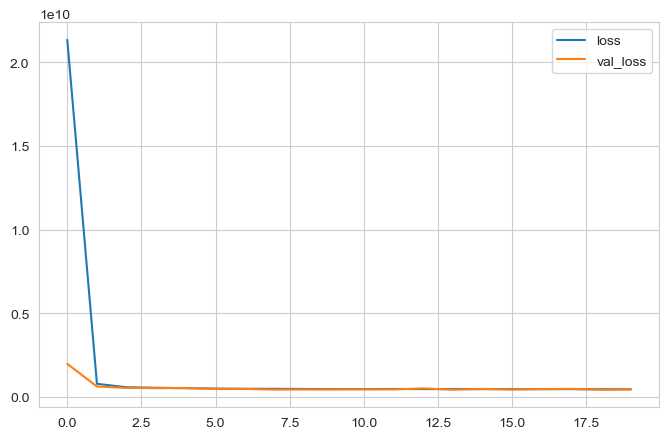

In [115]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [116]:
ypred=ts_model.predict(XCon_val)
print(ypred)
len(ypred)

23/23 [==============================] - 0s 2ms/step
[[354092.8 ]
 [322604.3 ]
 [319978.5 ]
 [381687.25]
 [367830.78]
 [378075.  ]
 [370117.8 ]
 [346664.25]
 [337960.75]
 [353192.72]
 [394749.2 ]
 [373194.94]
 [353921.47]
 [353206.8 ]
 [332213.94]
 [321446.88]
 [352066.12]
 [379220.56]
 [377159.  ]
 [387721.  ]
 [369304.3 ]
 [365501.88]
 [366744.22]
 [358810.25]
 [411922.12]
 [388538.62]
 [406034.5 ]
 [392380.94]
 [362305.25]
 [368277.03]
 [358366.38]
 [373340.97]
 [404091.84]
 [376846.34]
 [397051.8 ]
 [400495.3 ]
 [341024.84]
 [313806.78]
 [357085.7 ]
 [351688.7 ]
 [380521.44]
 [370159.5 ]
 [303714.88]
 [297837.25]
 [293426.38]
 [338786.66]
 [331447.06]
 [321078.56]
 [324423.8 ]
 [303300.25]
 [296323.72]
 [317085.9 ]
 [321451.88]
 [327240.8 ]
 [327941.6 ]
 [324822.3 ]
 [321607.5 ]
 [295679.88]
 [296843.  ]
 [340666.12]
 [317093.06]
 [323848.03]
 [328425.8 ]
 [313185.88]
 [281681.8 ]
 [305052.66]
 [322167.  ]
 [317207.25]
 [319432.88]
 [315030.25]
 [303949.78]
 [283411.5 ]
 [292011.  

731

Text(0.5, 0, 'Index')

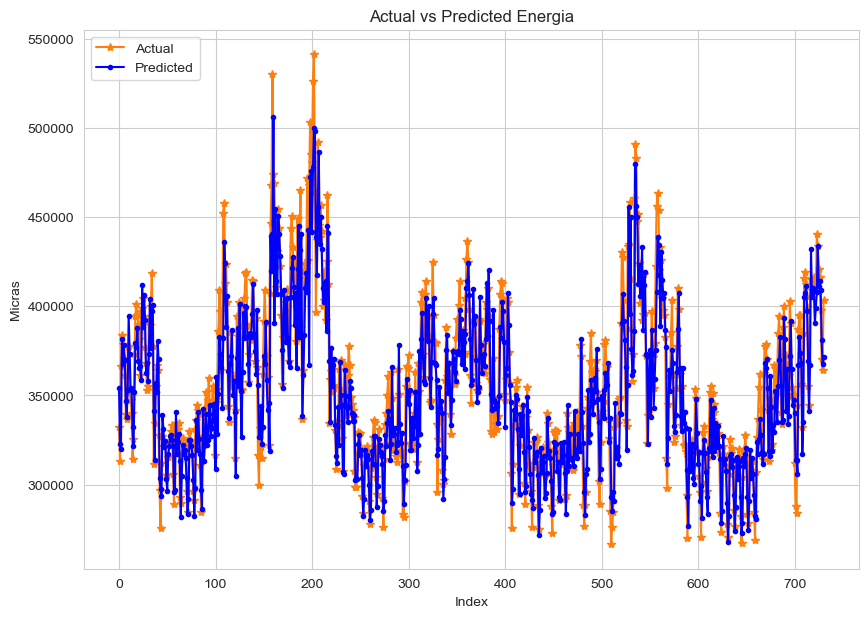

In [117]:
plt.figure(figsize=(10, 7))
plt.plot(range(yCon_val.size), yCon_val, linestyle='-', marker='*', color='tab:orange')
plt.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Energia')
plt.ylabel('Micras')
plt.xlabel('Index')